# 0 - Imports and load data

In [1]:
mp_API_key = '7WeId8uaz60cHZ2s'
mp_cryst = 'mp-9124'

In [12]:
from pymatgen.ext.matproj import MPRester
from pymatgen.analysis.diffraction.xrd import XRDCalculator
import matplotlib.pyplot as plt
import numpy as np

In [3]:
with MPRester(mp_API_key) as m:
    structure = m.get_structure_by_material_id(mp_cryst)

In [4]:
xrd = XRDCalculator(1.54060)
pattern = xrd.get_pattern(structure)

# 1 - Analysis of peaks

In [29]:
#we need to find the 3 firsts peaks
ind = np.array(-pattern.y).argsort()[:3]

print(f'Indices of first 3 peaks: {ind}\n')
print(f'Intensity of first 3 peaks:')
for i in range(3):
    print(f'[{ind[i]}]: {pattern.y[ind[i]]:.5f}')
    
    
#note: the peak [1] is really low compared to its neighbors, it's propable that it is just an interference

Indices of first 3 peaks: [0 2 3]

Intensity of first 3 peaks:
[0]: 100.00000
[2]: 87.00399
[3]: 45.90687


In [23]:
def print_data(pattern, imap, index):
    print(f'[{imap[index]}] peak intensity: {pattern.y[imap[index]]:.5f}')
    print(f'[{imap[index]}] peak angle: 2𝜃 = {pattern.x[imap[index]]:.5f}°')
    print(f'[{imap[index]}] hkl indices: {pattern.hkls[imap[index]]}')
    print(f'[{imap[index]}] distance between planes: {pattern.d_hkls[imap[index]]:.5f}')

In [24]:
print_data(pattern, ind, 0)

[0] peak intensity: 100.00000
[0] peak angle: 2𝜃 = 25.79023°
[0] hkl indices: [{'hkl': (1, 1, 1), 'multiplicity': 2}, {'hkl': (1, 0, 0), 'multiplicity': 6}]
[0] distance between planes: 3.45167


In [25]:
print_data(pattern, ind, 1)

[2] peak intensity: 87.00399
[2] peak angle: 2𝜃 = 42.74505°
[2] hkl indices: [{'hkl': (2, 1, 1), 'multiplicity': 6}, {'hkl': (1, 0, -1), 'multiplicity': 6}]
[2] distance between planes: 2.11371


In [26]:
print_data(pattern, ind, 2)

[3] peak intensity: 45.90687
[3] peak angle: 2𝜃 = 50.59676°
[3] hkl indices: [{'hkl': (2, 2, 1), 'multiplicity': 6}, {'hkl': (2, 1, 0), 'multiplicity': 12}, {'hkl': (1, 1, -1), 'multiplicity': 6}]
[3] distance between planes: 1.80258


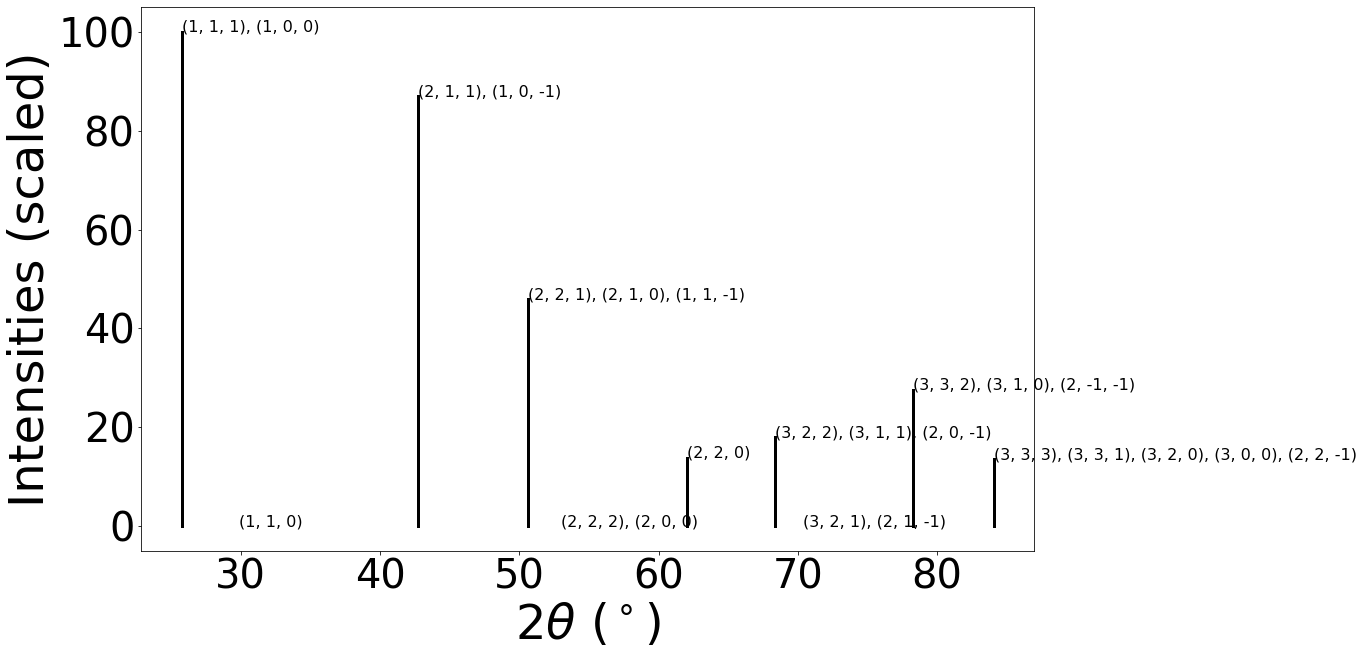

In [27]:
xrd.show_plot(structure)

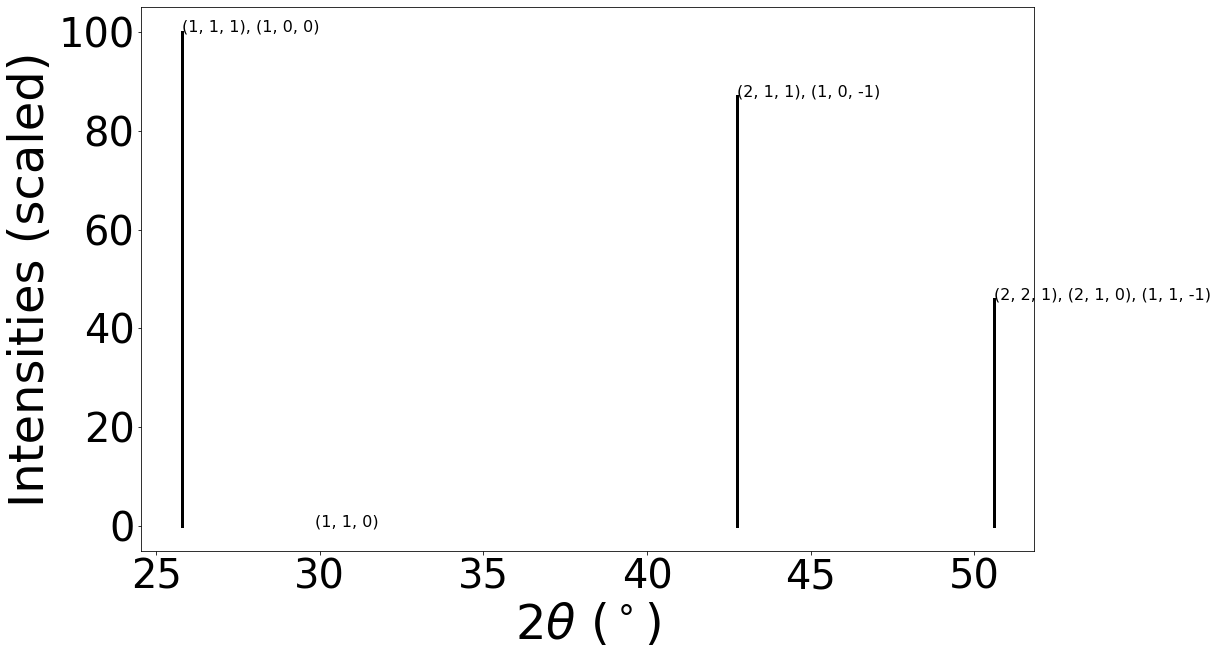

In [28]:
xrd.show_plot(structure,two_theta_range=[25,51])